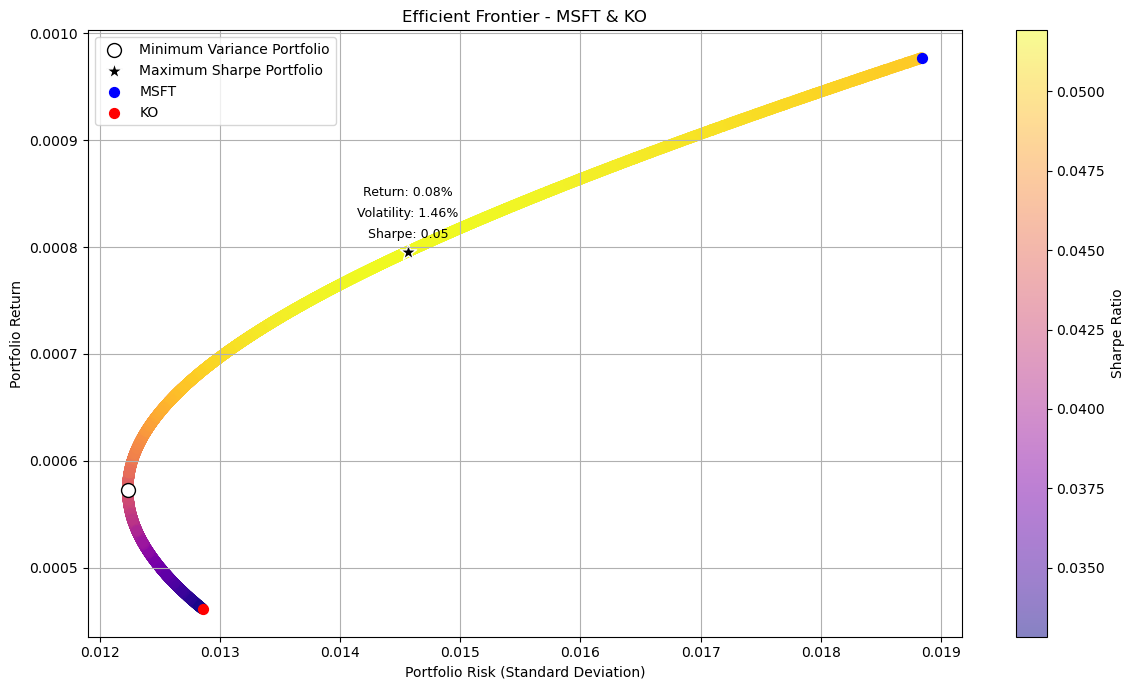

                        Return (%)  Volatility (%)  Sharpe Ratio  Weight MSFT  Weight KO
                  MSFT        0.10            1.88           NaN         1.00       0.00
                    KO        0.05            1.29           NaN         0.00       1.00
Min Variance Portfolio        0.06            1.22          0.04         0.22       0.78
  Max Sharpe Portfolio        0.08            1.46          0.05         0.65       0.35


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "FP - Group1 - BETA.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

returns_msft = df["Ex. Return (MSFT)"].dropna().values
returns_ko = df["Ex. Return (KO)"].dropna().values
mean_returns = np.array([np.mean(returns_msft), np.mean(returns_ko)])
cov_matrix = np.cov(returns_msft, returns_ko)

risk_free_rate = 0.01 / 252 
num_portfolios = 10000

portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
weights_list = []

for _ in range(num_portfolios):
    weights = np.random.random(2)
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk

    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)
    sharpe_ratios.append(sharpe_ratio)
    weights_list.append(weights)

portfolios_df = pd.DataFrame({
    "Portfolio Return": portfolio_returns,
    "Portfolio Risk": portfolio_risks,
    "Sharpe Ratio": sharpe_ratios,
    "Weight MSFT": [w[0] for w in weights_list],
    "Weight KO": [w[1] for w in weights_list]
})

min_var_port = portfolios_df.loc[portfolios_df["Portfolio Risk"].idxmin()]
max_sharpe_port = portfolios_df.loc[portfolios_df["Sharpe Ratio"].idxmax()]

msft_return, ko_return = mean_returns
msft_risk, ko_risk = np.sqrt(np.diag(cov_matrix))

# Plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    portfolios_df["Portfolio Risk"],
    portfolios_df["Portfolio Return"],
    c=portfolios_df["Sharpe Ratio"],
    cmap="plasma",
    marker="o",
    s=50,
    alpha=0.5,
)
plt.colorbar(scatter, label="Sharpe Ratio")

# Optimal Portfolios
plt.scatter(min_var_port["Portfolio Risk"], min_var_port["Portfolio Return"],
            color="white", edgecolor="black", marker="o", s=100, label="Minimum Variance Portfolio")
plt.scatter(max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"],
            color="black", edgecolor="white", marker="*", s=150, label="Maximum Sharpe Portfolio")

# Annotate important values
plt.annotate(f"Sharpe: {max_sharpe_port['Sharpe Ratio']:.2f}",
             (max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color="black")

plt.annotate(f"Volatility: {max_sharpe_port['Portfolio Risk']*100:.2f}%",
             (max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"]),
             textcoords="offset points", xytext=(0,25), ha='center', fontsize=9, color="black")

plt.annotate(f"Return: {max_sharpe_port['Portfolio Return']*100:.2f}%",
             (max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"]),
             textcoords="offset points", xytext=(0,40), ha='center', fontsize=9, color="black")

# Highlight individual stocks
plt.scatter(msft_risk, msft_return, color="blue", marker="o", s=50, label="MSFT")
plt.scatter(ko_risk, ko_return, color="red", marker="o", s=50, label="KO")

plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Portfolio Return")
plt.title("Efficient Frontier - MSFT & KO")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Summary table
summary_df = pd.DataFrame({
    "": ["MSFT", "KO", "Min Variance Portfolio", "Max Sharpe Portfolio"],
    "Return (%)": [msft_return*100, ko_return*100, min_var_port["Portfolio Return"]*100, max_sharpe_port["Portfolio Return"]*100],
    "Volatility (%)": [msft_risk*100, ko_risk*100, min_var_port["Portfolio Risk"]*100, max_sharpe_port["Portfolio Risk"]*100],
    "Sharpe Ratio": [np.nan, np.nan, min_var_port["Sharpe Ratio"], max_sharpe_port["Sharpe Ratio"]],
    "Weight MSFT": [1.0, 0.0, min_var_port["Weight MSFT"], max_sharpe_port["Weight MSFT"]],
    "Weight KO": [0.0, 1.0, min_var_port["Weight KO"], max_sharpe_port["Weight KO"]]
})

print(summary_df.round(2).to_string(index=False))


           Date  Adj Close (KO)  Ex. Return (MSFT)  Adj Close (KO).1  \
1006 2024-03-07      406.040070           0.017533         57.678406   
1007 2024-03-08      403.142151          -0.007137         57.756039   
1008 2024-03-11      401.455017          -0.004185         58.454704   
1009 2024-03-12      412.133484           0.026599         58.706997   
1010 2024-03-13      411.954864          -0.000433         59.308617   

      Ex. Return (KO)  Adj Close (SPY)  Ex. Return (SPY)  Unnamed: 7  \
1006        -0.001847       508.289978          0.009926         NaN   
1007         0.001346       505.239136         -0.006002         NaN   
1008         0.012097       504.804718         -0.000860         NaN   
1009         0.004316       510.235077          0.010757         NaN   
1010         0.010248       509.435303         -0.001567         NaN   

     Unnamed: 8 Unnamed: 9  
1006        NaN        NaN  
1007        NaN        NaN  
1008        NaN        NaN  
1009        NaN   

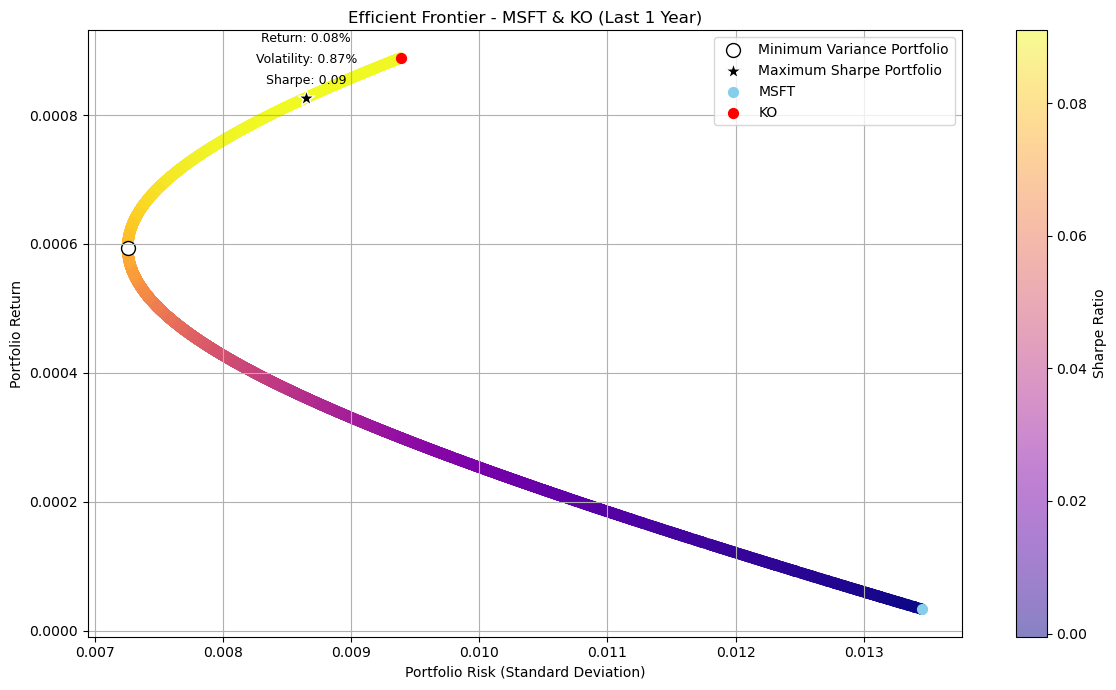

                        Return (%)  Volatility (%)  Sharpe Ratio  Weight MSFT  Weight KO
                  MSFT        0.00            1.35           NaN         1.00       0.00
                    KO        0.09            0.94           NaN         0.00       1.00
Min Variance Portfolio        0.06            0.73          0.08         0.34       0.66
  Max Sharpe Portfolio        0.08            0.87          0.09         0.07       0.93


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

last_year_df = df[df['Date'] >= df['Date'].max() - pd.DateOffset(years=1)]
print(last_year_df.head())

returns_msft = last_year_df["Ex. Return (MSFT)"].dropna().values
returns_ko = last_year_df["Ex. Return (KO)"].dropna().values

# Compute mean returns and covariance matrix
mean_returns = np.array([np.mean(returns_msft), np.mean(returns_ko)])
cov_matrix = np.cov(returns_msft, returns_ko)

risk_free_rate = 0.01 / 252  
num_portfolios = 10000

portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
weights_list = []

for _ in range(num_portfolios):
    weights = np.random.random(2)
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk

    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)
    sharpe_ratios.append(sharpe_ratio)
    weights_list.append(weights)

portfolios_df = pd.DataFrame({
    "Portfolio Return": portfolio_returns,
    "Portfolio Risk": portfolio_risks,
    "Sharpe Ratio": sharpe_ratios,
    "Weight MSFT": [w[0] for w in weights_list],
    "Weight KO": [w[1] for w in weights_list]
})

min_var_port = portfolios_df.loc[portfolios_df["Portfolio Risk"].idxmin()]
max_sharpe_port = portfolios_df.loc[portfolios_df["Sharpe Ratio"].idxmax()]

msft_return, ko_return = mean_returns
msft_risk, ko_risk = np.sqrt(np.diag(cov_matrix))

# Plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    portfolios_df["Portfolio Risk"],
    portfolios_df["Portfolio Return"],
    c=portfolios_df["Sharpe Ratio"],
    cmap="plasma",
    marker="o",
    s=50,
    alpha=0.5,
)
plt.colorbar(scatter, label="Sharpe Ratio")

# Optimal Portfolios
plt.scatter(min_var_port["Portfolio Risk"], min_var_port["Portfolio Return"],
            color="white", edgecolor="black", marker="o", s=100, label="Minimum Variance Portfolio")
plt.scatter(max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"],
            color="black", edgecolor="white", marker="*", s=150, label="Maximum Sharpe Portfolio")

# Annotate Sharpe info
plt.annotate(f"Sharpe: {max_sharpe_port['Sharpe Ratio']:.2f}",
             (max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color="black")

plt.annotate(f"Volatility: {max_sharpe_port['Portfolio Risk']*100:.2f}%",
             (max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"]),
             textcoords="offset points", xytext=(0,25), ha='center', fontsize=9, color="black")

plt.annotate(f"Return: {max_sharpe_port['Portfolio Return']*100:.2f}%",
             (max_sharpe_port["Portfolio Risk"], max_sharpe_port["Portfolio Return"]),
             textcoords="offset points", xytext=(0,40), ha='center', fontsize=9, color="black")

# Highlight individual stocks
plt.scatter(msft_risk, msft_return, color="skyblue", marker="o", s=50, label="MSFT")
plt.scatter(ko_risk, ko_return, color="red", marker="o", s=50, label="KO")

plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Portfolio Return")
plt.title("Efficient Frontier - MSFT & KO (Last 1 Year)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Summary Table
summary_df = pd.DataFrame({
    "": ["MSFT", "KO", "Min Variance Portfolio", "Max Sharpe Portfolio"],
    "Return (%)": [msft_return*100, ko_return*100, min_var_port["Portfolio Return"]*100, max_sharpe_port["Portfolio Return"]*100],
    "Volatility (%)": [msft_risk*100, ko_risk*100, min_var_port["Portfolio Risk"]*100, max_sharpe_port["Portfolio Risk"]*100],
    "Sharpe Ratio": [np.nan, np.nan, min_var_port["Sharpe Ratio"], max_sharpe_port["Sharpe Ratio"]],
    "Weight MSFT": [1.0, 0.0, min_var_port["Weight MSFT"], max_sharpe_port["Weight MSFT"]],
    "Weight KO": [0.0, 1.0, min_var_port["Weight KO"], max_sharpe_port["Weight KO"]]
})

print(summary_df.round(2).to_string(index=False))


In [7]:

annualized_mean_returns = mean_returns * 252
annualized_risk = np.sqrt(252) * np.sqrt(np.diag(cov_matrix))

annualized_portfolio_data = {
    "": ["MSFT", "KO", "Minimum Variance Portfolio", "Maximum Sharpe Portfolio"],
    "Annualized Return": [f"{annualized_mean_returns[0]*100:.2f}%", 
                          f"{annualized_mean_returns[1]*100:.2f}%",
                          f"{min_var_port['Portfolio Return']*252*100:.2f}%",
                          f"{max_sharpe_port['Portfolio Return']*252*100:.2f}%"],
    "Annualized Risk (std.dev)": [f"{annualized_risk[0]*100:.2f}%", 
                                  f"{annualized_risk[1]*100:.2f}%",
                                  f"{min_var_port['Portfolio Risk']*np.sqrt(252)*100:.2f}%",
                                  f"{max_sharpe_port['Portfolio Risk']*np.sqrt(252)*100:.2f}%"]
}


df_annualized_portfolio_table = pd.DataFrame(annualized_portfolio_data)

df_annualized_portfolio_table


,,Annualized Return,Annualized Risk (std.dev)
0,MSFT,0.84%,21.35%
1,KO,22.40%,14.90%
2,Minimum Variance Portfolio,14.97%,11.52%
3,Maximum Sharpe Portfolio,20.84%,13.73%
